In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from scipy import stats

In [66]:
df = pd.read_csv('csv/SSDSE-D-2023.csv', header=1, encoding='Shift_JIS')

In [47]:
print(df.head(1))

   男女の別   地域コード 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数  R00000   全国       112462           39.6  14.1  12.8       4.2   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他.4  通勤・通学.1  仕事.1  学業.1    起床  朝食開始  \
0             20.1         16.5  ...     16       79   340   393  6:38  7:11   

    夕食開始     就寝    出勤  仕事からの帰宅時間  
0  18:58  23:04  8:20      18:34  

[1 rows x 124 columns]


In [67]:
df.isnull().sum()

男女の別             0
地域コード            0
都道府県             0
推定人口（10歳以上）      0
学習・自己啓発・訓練の総数    0
                ..
朝食開始             0
夕食開始             0
就寝               0
出勤               0
仕事からの帰宅時間        0
Length: 124, dtype: int64

In [32]:
# スマートフォン・家庭用ゲーム機などによるゲームのデータを確認
print(df['スマートフォン・家庭用ゲーム機などによるゲーム'])

0      42.9
1      44.2
2      34.4
3      36.9
4      42.5
       ... 
139    34.7
140    31.4
141    33.0
142    32.3
143    34.9
Name: スマートフォン・家庭用ゲーム機などによるゲーム, Length: 144, dtype: float64


In [41]:
# スマートフォン・家庭用ゲーム機などによるゲームのデータの統計情報
print(df['スマートフォン・家庭用ゲーム機などによるゲーム'].describe())

count    144.000000
mean      39.897917
std        4.923150
min       29.300000
25%       36.575000
50%       39.850000
75%       43.750000
max       52.700000
Name: スマートフォン・家庭用ゲーム機などによるゲーム, dtype: float64


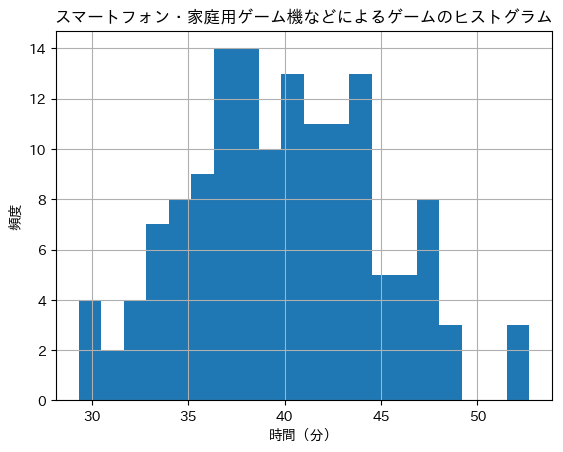

In [44]:
# スマートフォン・家庭用ゲーム機などによるゲームのデータのヒストグラムを作成
df['スマートフォン・家庭用ゲーム機などによるゲーム'].hist(bins=20)
plt.title('スマートフォン・家庭用ゲーム機などによるゲームのヒストグラム')
plt.xlabel('時間（分）')
plt.ylabel('頻度')
plt.show()

In [69]:
# 趣味におけるスマホの利用時間 = ＣＤ・スマートフォンなどによる音楽鑑賞 + スマートフォン・家庭用ゲーム機などによるゲーム
df['趣味におけるスマホの利用時間'] = df['ＣＤ・スマートフォンなどによる音楽鑑賞'] + df['スマートフォン・家庭用ゲーム機などによるゲーム']
df['1日あたりの趣味におけるスマホの利用時間'] = df['趣味におけるスマホの利用時間'] / 30

# 睡眠時間 = 起床(hh:mm) - 就寝(hh:mm)
df['起床'] = pd.to_datetime(df['起床'], format='%H:%M')
df['就寝'] = pd.to_datetime(df['就寝'], format='%H:%M')
df['睡眠時間'] = ((df['起床'] - df['就寝']).dt.total_seconds() / 3600) + 24

# 趣味におけるスマホの利用時間と睡眠時間の相関
df[['1日あたりの趣味におけるスマホの利用時間', '睡眠時間']].corr()

,1日あたりの趣味におけるスマホの利用時間,睡眠時間
1日あたりの趣味におけるスマホの利用時間,1.000000,-0.381804
睡眠時間,-0.381804,1.000000


In [72]:
df[['1日あたりの趣味におけるスマホの利用時間', '睡眠時間']].mean()

1日あたりの趣味におけるスマホの利用時間    2.987801
睡眠時間                    7.637963
dtype: float64

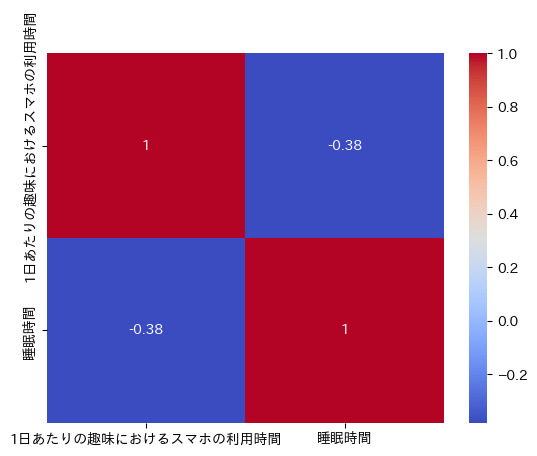

In [73]:
sns.heatmap(df[['1日あたりの趣味におけるスマホの利用時間', '睡眠時間']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [75]:
r, p = stats.pearsonr(df['1日あたりの趣味におけるスマホの利用時間'], df['睡眠時間'])
print(f'相関係数: {r}, p値: {p}')

相関係数: -0.38180398259760684, p値: 2.3370667856975906e-06
